<a href="https://colab.research.google.com/github/clerfayt28/Pitonchik/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.linalg as lina
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [3]:
N1 = 4
N2 = 4
L1 = 1
L2 = 1
X1 = np.linspace(0,L1,N1)
X2 = np.linspace(0,L2,N2)
Tbot = np.zeros((1,N1))
Ttop = np.zeros((N2,1))
A, B, C = 300, 220, 150
a = 1/((X1[1]-X1[0])**2)
b = 1/((X2[1]-X2[0])**2)
c = -2*(a+b)

In [4]:
K = np.zeros(((N1-1)*(N2-1),(N1-1)*(N2-1)))
T = np.zeros(((N1),(N2)))
P = np.zeros(((N1-1)*(N2-1),1))
K.shape

for j in range (N2-1):
  for i in range (N1-1):
    K[i+j*(N1-1),i+j*(N2-1)] = c
    if i != N2-2:
      K[i+1+j*(N1-1),i+j*(N2-1)] = a
    if j != N2-2:
      K[i-1+j*(N1-1),i+j*(N2-1)] = a
      K[i+j*(N1-1),i+(j+1)*(N2-1)] = b
    if i == (N1-2):
      K[i+j*(N1-1),i+j*(N2-1)] = c+a
  if j == (N2-2):
    for i in range (N1-1):
      K[i+j*(N1-1),i+j*(N2-1)] = c+b
    if i == (N1-2):
      K[i+j*(N1-1),i+j*(N2-1)] = c+b+a

In [5]:
for i in range (N1):
  Tbot[0,i] = (C-B)/L2*X2[i]+B

In [6]:
for i in range (N2):
  Ttop[i,0] = (B-A)/L1*X1[i]+A

In [7]:
for j in range (N2-1):
  for i in range (N1-1):
    if i == 0:
      P[i+j*(N1-1),0] = -a*Tbot[0,j]
    if j == 0:
      P[0,0] = -a*Tbot[0,i]-b*Ttop[i]
      P[i+1+j*(N1-1),0] = -b*Ttop[i,0]

In [8]:
T = lina.solve(K, P)

In [9]:
T = np.reshape(T,(N1-1,N2-1))

Ttop = Ttop[::-1]
Ttop = Ttop[0:N2-1]
Ttop.shape

T = np.concatenate((Ttop, T), axis=1)

T = np.concatenate((T, Tbot), axis=0)

np.reshape(T[0,:N1],(1,T[0,:N1].shape[0]))
T = np.concatenate((np.reshape(T[0,:N1],(1,T[0,:N1].shape[0])), T), axis=0)
np.reshape(T[:,T.shape[1]-1],(N2+1,1))
T = np.concatenate((T, np.reshape(T[:,T.shape[1]-1],(N2+1,1))), axis=1)

In [10]:
X1 = np.linspace(0,L1,N1+1)
X2 = np.linspace(0,L2,N2+1)

,0,1,2,3,4
0,220.000000,165.812240,171.317194,186.173917,186.173917
1,220.000000,165.812240,171.317194,186.173917,186.173917
2,246.666667,71.931766,33.282621,41.939457,41.939457
3,273.333333,57.777778,19.259259,92.535750,92.535750
4,220.000000,196.666667,173.333333,150.000000,150.000000


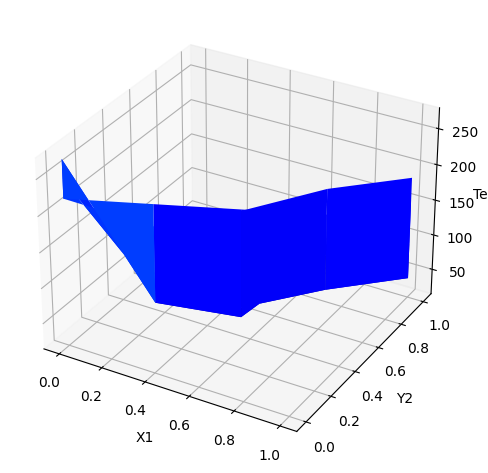

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, T, cmap=cm.jet, linewidth=1, vmin = 0, vmax = 1000)
ax.set_xlabel('X1')
ax.set_ylabel('Y2')
ax.set_zlabel('Temp')
fig.tight_layout()

pd.DataFrame(data=T)